<a href="https://colab.research.google.com/github/Durostorum/COT2000/blob/main/Georgi_Nikolov_CAP4773_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP4773 & CAP5768 - Introduction to Data Science Analytics

## Exercise 2 - Statistical Learning

* **Instructor:** Dr. Fernando Koch (kochf@fau.edu)
* **TA:** Md Robiul Hassen (hassanm2023@fau.edu), MD Ahnaf Akif (makif2022@fau.edu)


### Description

In this lab exercise, students will explore data visualization in Python by applying a selection of specialized libraries. Visualization is a crucial step in the data science workflow, as it allows analysts to transform raw data into compelling and insightful stories.

The exercise will focus on libraries discussed in class, including:
* **Matplotlib** - the foundation for Python plotting, providing full control for creating static, animated, and interactive visualizations.
* **Seaborn** - a high-level library built on Matplotlib, designed to produce attractive and informative statistical graphics with minimal code.
* **Statsmodels** - a library that supports advanced statistical modeling and includes functions for time series analysis and regression visualization.
* **JoyPy** - a specialized package for generating joyplots (ridgeline plots) to visualize distributions across multiple categories.
* **PyWaffle** - a library for creating waffle charts, a unique way to visualize progress toward goals or proportional relationships.

### Deliverable

1. Complete Your Experiments at the bottom!
2. Submit your copy of this notebook
3. Select ONE question / answer / plot that you like the most and add to our [Collective Exercise Document](https://docs.google.com/document/d/18e5Ekun64cn2hWr-bNyYi0iCLi8JUW8aBVXVLh2e7VE/edit?usp=sharing)
  *  **NOTE: Need to be logged in using your @FAU account!**



---

## PART 1: Setup & Data Load

For the code below, brainstorm with GenAI what is being done:
* What role does each library play?
* Why do we set RANDOM_STATE = 42 and np.random.seed(42)? What happens if we don't?
* How is the dataset loaded?
* What should we check right after loading the data?

Remember: it is all about good questions!

[Gemini Conversation](https://g.co/gemini/share/87fe4e5ac08b)



In [ ]:
# Minimal imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA

# Reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Load Titanic (seaborn). If this fails in your environment, switch to a CSV with pd.read_csv('titanic.csv').
df = sns.load_dataset("titanic").copy()
print("Rows, Cols:", df.shape)
df.head()

Rows, Cols: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 1.a) Data Overview

In [ ]:
print(df.info())
display(df.describe(include='all').transpose().head(20))
df.isna().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


---

## PART 2 - Simple Logistic Regression (Predict `survived`)

#### Question:
Which passenger characteristics (class, gender, age, fare) are most strongly associated with survival, and how well can we predict survival from them?  

#### Method:
We will use logistic regression to model the probability of survival based on a few key features.

* **Target:** `survived` (binary: 0 = did not survive, 1 = survived)  
* **Features:** `pclass`, `sex`, `age`, `fare` (a mix of categorical and numeric)  
* **Goal:** build a simple model to classify survival and evaluate its performance  


#### Notes:
* The **ROC Curve (Receiver Operating Characteristic Curve)** is a common way to evaluate the performance of a binary classifier like logistic regression.
* The ROC curve plots the trade-off between the True Positive Rate (sensitivity/recall) and the False Positive Rate (1 - specificity) at different classification thresholds.

* AUC (Area Under Curve) provides a single number summarizing the ROC curve.
* AUC = 0.5 → random guessing
* AUC = 1.0 → perfect classifier

* The **Confusion Matrix** is a simple but powerful way to evaluate the results of a classification model (like logistic regression) by comparing predicted labels with the true labels.

#### Hints:
* Ask GenAI to explain each part of the code, methods being used, etc
* If in doubt, Ask GenAI for 'questions to ask' (or strategy) to understand this code!


{'accuracy': 0.7932960893854749, 'roc_auc': np.float64(0.836627140974967)}


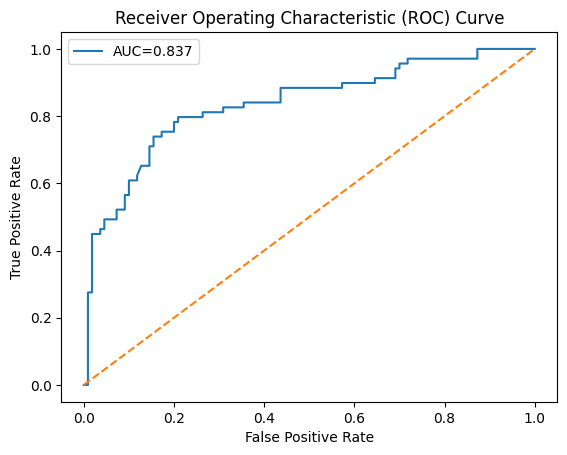

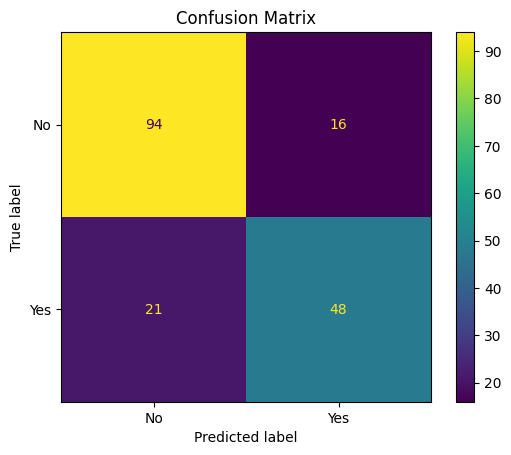

In [ ]:

# Step 1 — Select columns
# Choose the target (what to predict) and the features (inputs).
# - target = "survived" → binary outcome (0 = no, 1 = yes)
# - features = ["pclass","sex","age","fare"] → small, interpretable set
# - Create X for features and y for labels

target = "survived"
features = ["pclass", "sex", "age", "fare"]

X = df[features].copy()
y = df[target].copy()

# Step 2 — Handle missing values
# Clean the data so the model can train without errors.
# - Fill missing ages with the median
# - Drop rows missing fare/pclass/sex
# - Realign y to the cleaned X index

X["age"] = X["age"].fillna(X["age"].median())
X = X.dropna(subset=["fare","pclass","sex"])
y = y.loc[X.index]

# Step 3 — Train/Test Split
# Split data into training and test sets for fair evaluation.
# - 80% training, 20% testing
# - stratify=y keeps the class balance similar across splits
# - random_state ensures reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Step 4 — Define column types
# Tell the pipeline which columns are numeric vs categorical.
# - Numeric: age, fare, pclass → will be scaled
# - Categorical: sex → will be one‑hot encoded

num_cols = ["age", "fare", "pclass"]
cat_cols = ["sex"]

# Step 5 — Preprocessing + Model (Pipeline)
# Build a pipeline that preprocesses data and trains logistic regression.
# - Standardize numeric features
# - One‑hot encode categorical features
# - Fit LogisticRegression on the transformed features

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

clf = Pipeline(steps=[
    ("prep", preprocess),
    ("model", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

clf.fit(X_train, y_train)

# Step 6 — Predictions + Metrics
# Evaluate model performance with accuracy and ROC‑AUC.
# - predict_proba gives survival probabilities
# - threshold at 0.5 to create class labels
# - accuracy = overall correctness; AUC = ranking quality

proba = clf.predict_proba(X_test)[:, 1]
pred  = (proba >= 0.5).astype(int)
acc = accuracy_score(y_test, pred)
auc = roc_auc_score(y_test, proba)
print({"accuracy": acc, "roc_auc": auc})

# Step 7 — Plot ROC Curve
# Visualize the trade‑off between sensitivity (TPR) and false alarms (FPR).
# - Each threshold produces a point on the ROC curve
# - Diagonal line is random guessing; closer to top‑left is better

fpr, tpr, thr = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC={auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("Receiver Operating Characteristic (ROC) Curve"); plt.legend(); plt.show()

# The Confusion Matrix is a simple but powerful way to evaluate the results of a
# classification model (like logistic regression) by comparing predicted labels
# with the true labels.

cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm, display_labels=["No","Yes"]).plot(values_format="d")
plt.title("Confusion Matrix"); plt.show()


## EXAMPLE: My Experiment

#### Question:

Were women and children from higher classes more likely to survive than men from lower classes?

#### Answer:

Yes, women from higher classes were significantly more likely to survive than men, especially those from lower classes.

This strongly reflects the social norms of the time, especially the principle of “women and children first” during lifeboat loading. In addition:
* Class privilege played a major role. First-class passengers had better access to lifeboats.
* The disparity suggests systemic factors influenced survival more than random chance — like location of cabins, crew assistance, and lifeboat availability.

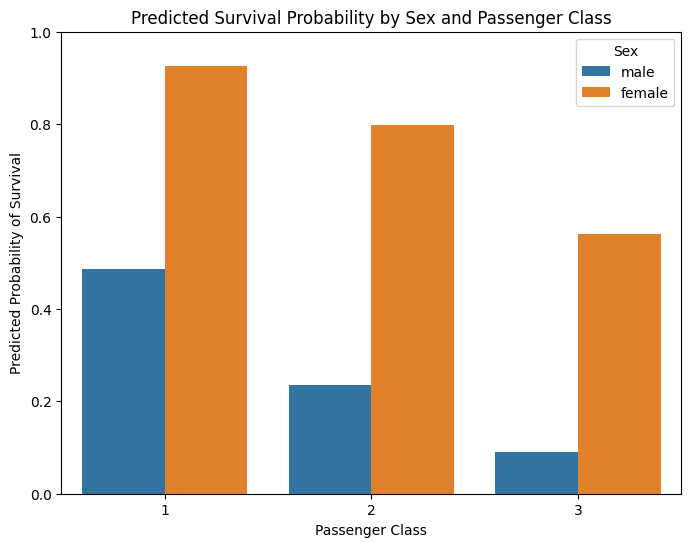

In [ ]:
# Define a synthetic dataset to simulate survival probabilities
median_age = X["age"].median()
median_fare = X["fare"].median()

# Create combinations of sex and pclass
sim_data = pd.DataFrame([
    {"sex": sex, "pclass": pclass, "age": median_age, "fare": median_fare}
    for sex in ["male", "female"]
    for pclass in [1, 2, 3]
])

# Predict survival probabilities using trained pipeline
sim_data["survival_proba"] = clf.predict_proba(sim_data)[:, 1]

# Plot predicted probabilities
plt.figure(figsize=(8,6))
sns.barplot(data=sim_data, x="pclass", y="survival_proba", hue="sex")
plt.ylim(0, 1)
plt.title("Predicted Survival Probability by Sex and Passenger Class")
plt.ylabel("Predicted Probability of Survival")
plt.xlabel("Passenger Class")
plt.legend(title="Sex")
plt.show()

# PART 3 - YOUR EXPERIMENTS

**Design and run TWO experiments with Logistic Regression to test different hypotheses about Titanic passenger survival.**


#### Hints:
* Ask GenAI to help your formulate interesting questions about the social conditions, survival impact, and other elements of the Titanic-sphere.
* The questions should involve the correlation of multiple features (multi-dimensionality) and apply linear regression for modelling.
* Consider questions with  'interesting social relevance' (e.g social *stratus* versus behavior)
* Consider experiments that will result in beautiful plot (visualization)





### EXPERIMENT 1 —  The Impact of Fare on Survival Within Each Class

#### Question  
Did higher ticket prices improve survival chances independently of class?



#### Answer
While there seems to be a general trend of slightly higher survival rates within each class as the fare increases, the most significant factor influencing survival appears to be the passenger class itself. First-class passengers consistently had much higher survival rates across most fare ranges compared to Second and Third-class passengers. Similarly, Second-class passengers generally had higher survival rates than Third-class passengers


#### Method  
The method used in Experiment 1 involves visualizing the average survival rate across different passenger classes and discretized fare ranges using a heatmap.
* Target: The target is to understand the average survival rate of passengers.
* Features: The features used are passenger class (class) and fare (fare), which was discretized into ranges.
* Goal: The goal is to visually explore how the combination of passenger class and fare influences the survival probability and to see if higher ticket prices improved survival chances independently of class.



/tmp/ipython-input-577943521.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values='survived', index='fare_ discretized', columns='class', aggfunc='mean')


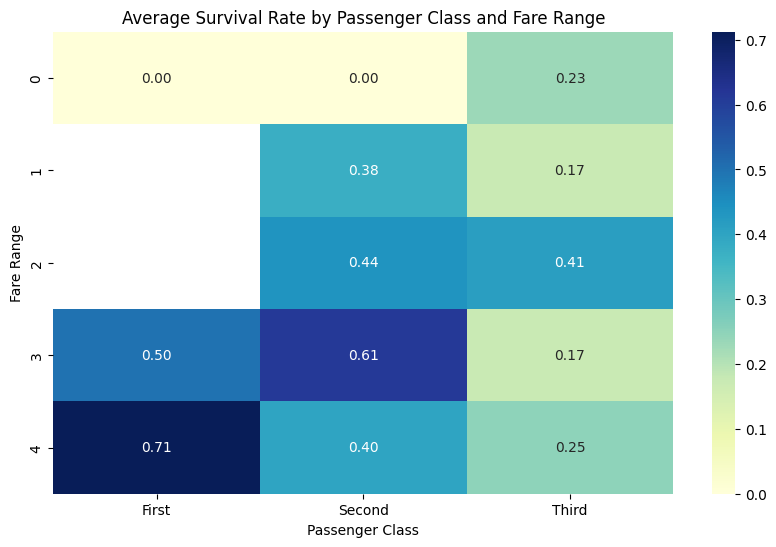

In [ ]:
# CODE FOR EXPERIMENT 1
# REMEMBER THAT IT MUST RESULT IN A BEAUTIFUL PLOT AND SUPPORT YOUR ANSWER

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic (seaborn). If this fails in your environment, switch to a CSV with pd.read_csv('titanic.csv').
df = sns.load_dataset("titanic").copy()

# Create a pivot table to show the average survival rate by class and fare ranges
# We need to discretize fare for the heatmap
df['fare_ discretized'] = pd.qcut(df['fare'], q=5, labels=False, duplicates='drop')

pivot_table = df.pivot_table(values='survived', index='fare_ discretized', columns='class', aggfunc='mean')

# Visualize the relationship between fare, class, and survival using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Survival Rate by Passenger Class and Fare Range")
plt.xlabel("Passenger Class")
plt.ylabel("Fare Range")
plt.show()

### EXPERIMENT 2 — The Combined Effect of Family Size and Class on Survival

#### Question  
"Did traveling with family impacted survival chances, and was this effect consistent across all passenger classes?

#### Answer
Yes, both traveling with family and social status (class) appear to have significantly impacted survival rates.

Impact of Family Size: Passengers traveling with a small number of family members (1 to 3) generally show higher survival rates across all classes compared to those traveling alone or with very large families. This is particularly noticeable in First and Second class. Passengers with very large families (especially in Third class) had significantly lower survival rates.
Impact of Social Status (Class): Regardless of family size, passengers in First and Second class consistently had higher survival rates than those in Third class. This reinforces the observation from the first experiment that social status was a major factor in survival.
Interaction: The heatmap suggests an interaction between family size and class. For instance, while having a small family size improved survival chances, this benefit was much more pronounced for passengers in higher classes. Conversely, having a large family size was particularly detrimental to survival in Third class.
Overall, the data suggests that while traveling with a small family offered some advantage, social class remained the most dominant factor influencing survival on the Titanic.

#### Method  
The method used in Experiment 2 involves creating a new feature for family size and then visualizing the average survival rate across different family sizes and passenger classes using a heatmap.
* Target: The target is to understand the average survival rate of passengers.
* Features: The features used are family size (family_size, calculated from sibsp and parch) and passenger class (class).
* Goal: The goal is to visually explore how the combination of family size and passenger class influences the survival probability and to determine if traveling with family or being alone significantly impacted survival rates, and whether social status (class) played a role in this dynamic.



/tmp/ipython-input-2836756243.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_family = df.pivot_table(values='survived', index='family_size', columns='class', aggfunc='mean')


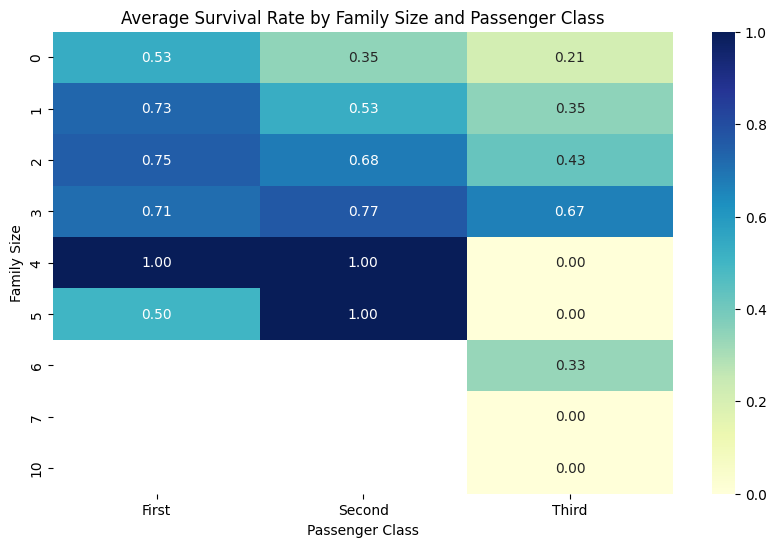

In [ ]:
# CODE FOR EXPERIMENT 2
# REMEMBER THAT IT MUST RESULT IN A BEAUTIFUL PLOT AND SUPPORT YOUR

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset if not already loaded
if 'df' not in locals():
    df = sns.load_dataset("titanic").copy()

# Create a new feature for family size
df['family_size'] = df['sibsp'] + df['parch']

# Create a pivot table to show the average survival rate by family size and class
pivot_table_family = df.pivot_table(values='survived', index='family_size', columns='class', aggfunc='mean')

# Visualize the relationship between family size, class, and survival using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table_family, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Survival Rate by Family Size and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Family Size")
plt.show()